# Numpy

In [38]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros

import datetime as dt

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Tutorial

In [33]:
m = np.matrix([[1, 0, 0], 
               [1, 1, 0], 
               [0, 0, 1]])
u, s, v = np.linalg.svd(m)

In [34]:
u

matrix([[-0.52573111,  0.        , -0.85065081],
        [-0.85065081,  0.        ,  0.52573111],
        [ 0.        ,  1.        ,  0.        ]])

In [35]:
s

array([1.61803399, 1.        , 0.61803399])

In [36]:
v

matrix([[-0.85065081, -0.52573111, -0.        ],
        [ 0.        ,  0.        ,  1.        ],
        [-0.52573111,  0.85065081,  0.        ]])

In [37]:
np.dot(u, np.dot(np.diag(s), v))

matrix([[ 1.00000000e+00, -8.51707167e-17,  0.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

### Advanced

In [6]:
a = np.random.randn(9, 6) + 1j*np.random.randn(9, 6)
b = np.random.randn(2, 7, 8, 3) + 1j*np.random.randn(2, 7, 8, 3)

In [25]:
u, s, vh = np.linalg.svd(a, full_matrices=True)

np.allclose(a, np.dot(u[:, :6] * s, vh))

smat = np.zeros((9, 6), dtype=complex)
smat[:6, :6] = np.diag(s)
np.allclose(a, np.dot(u, np.dot(smat, vh)))

True

In [70]:
X = np.random.random((5, 8))
X = X.round(2)

In [71]:
X_0mean = X - X.mean(0)
X_0mean.round(2)

array([[-0.02, -0.3 ,  0.38,  0.03, -0.2 ,  0.24,  0.23,  0.11],
       [-0.07, -0.3 ,  0.29,  0.01,  0.02, -0.3 , -0.51, -0.25],
       [-0.25,  0.01,  0.36,  0.15,  0.26, -0.01,  0.05,  0.08],
       [-0.01,  0.29, -0.54,  0.03, -0.01, -0.01,  0.49,  0.18],
       [ 0.35,  0.32, -0.48, -0.21, -0.05,  0.06, -0.26, -0.1 ]])

In [74]:
U, s, Vh = svd(X_0mean, full_matrices=False)

In [75]:
U

array([[-0.27827555,  0.45856512,  0.71573725,  0.00096885,  0.4472136 ],
       [-0.5069438 , -0.51472599, -0.14606446, -0.50668561,  0.4472136 ],
       [-0.28528379,  0.2826214 , -0.57217705,  0.557989  ,  0.4472136 ],
       [ 0.61006928,  0.3446224 , -0.26237227, -0.49011394,  0.4472136 ],
       [ 0.46043386, -0.57108294,  0.26487654,  0.4378417 ,  0.4472136 ]])

In [76]:
s

array([1.17639649e+00, 8.86787103e-01, 5.02282425e-01, 3.02079958e-01,
       3.24267571e-16])

In [77]:
Vh

array([[ 0.22732445,  0.47345593, -0.7700688 , -0.11441662, -0.04911604,
         0.09322978,  0.30558993,  0.11651856],
       [-0.27867014, -0.07119135,  0.24216819,  0.20441095, -0.00385443,
         0.25252511,  0.78875509,  0.36183848],
       [ 0.46643985, -0.33437577,  0.07600906, -0.25744545, -0.60813371,
         0.47748906,  0.02602774, -0.00844468],
       [ 0.17908205,  0.51400703,  0.36017909, -0.09265631,  0.3898263 ,
         0.58868506, -0.22332737,  0.13047015],
       [-0.36992165,  0.54478502,  0.22899244, -0.10609532, -0.65473657,
        -0.17421768, -0.14203411,  0.15319281]])

In [81]:
k = 3
svd_tr = TruncatedSVD(n_components=k)
svd_tr.fit(X_0mean)

TruncatedSVD(algorithm='randomized', n_components=3, n_iter=5,
             random_state=None, tol=0.0)

# surprise

The dataframe must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings in this order.

In [9]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNWithMeans

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.15)
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

uid = str(196)
iid = str(302)

pred = algo.predict(uid, iid, r_ui=4, verbose=True)
test_pred = algo.test(testset)

print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

print("User-based Model : Training Set")
train_pred = algo.test(trainset.build_testset())
accuracy.rmse(train_pred)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 4.24   {'actual_k': 50, 'was_impossible': False}
User-based Model : Test Set
RMSE: 0.9356
User-based Model : Training Set
RMSE: 0.4584


0.4583957487697908

In [11]:
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])

# Scipy

### tutorial

- Decompose the matrix A<br>
defined 3×2 matrix, then the 3×3 U matrix, 2 element Sigma vector, and 2×2 V^T matrix elements calculated from the decomposition.

In [3]:
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
print('-'*20)
# SVD
U, s, VT = svd(A)
print(U)
print('-'*20)
print(s)
print('-'*20)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
--------------------
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
--------------------
[9.52551809 0.51430058]
--------------------
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [4]:
Sigma = zeros((A.shape[0], A.shape[1]))

In [5]:
Sigma[:A.shape[1], :A.shape[1]] = diag(s)

In [6]:
B = U.dot(Sigma.dot(VT))
print(B)

[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [7]:
A

array([[1, 2],
       [3, 4],
       [5, 6]])

## TruncatedSVD
truncated SVD는 이러한 SVD의 변형입니다. 시그마 행렬의 대각원소(특이값) 가운데 상위 n개만 골라낸 것입니다. 이렇게 하면 기존 행렬 A의 성질을 100% 복원할 수는 없지만, (그 만큼 데이터 정보를 압축) 행렬 A와 거의 근사한 값이 나오게 됩니다. TruncatedSVD는 U, Sigma, Vt 반환 값을 제공하지 않습니다.<br><br>


n_componentsint : default값은 2이며 원하는 차원의 데이터가 출력됩니다. 피쳐값보다 작아야 하는 것이 원칙입니다.<br>
fit_transform : perform dimensionality reduction

In [8]:
A = array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
print(A)
print('-'*40)
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
----------------------------------------
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


In [10]:
data

In [32]:
df.head()

,user,item,rate,id
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [25]:
user_movie_rating = df.pivot_table('rate', index = 'user', columns='item').fillna(0)

In [26]:
user_movie_rating.head()

item,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
user_movie_rating.shape

(943, 1682)

In [28]:
movie_user_rating = user_movie_rating.values.T

array([[5., 4., 0., ..., 4., 0., 4.],
       [3., 0., 0., ..., 0., 0., 0.],
       [5., 5., 0., ..., 2., 0., 5.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
type(movie_user_rating)

numpy.ndarray

In [31]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_user_rating)
matrix.shape

(1682, 12)

In [34]:
matrix[0]

array([61.4693964 , 21.35949696, -3.69775461, -2.58161579, 22.23418771,
       15.97591396, 12.72922934, -2.71810738,  6.3224969 ,  0.27452814,
        2.62363607, -2.12719961])

In [35]:
corr = np.corrcoef(matrix)
corr.shape

(1682, 1682)

In [36]:
corr2 = corr[:200, :200]
corr2.shape

(200, 200)

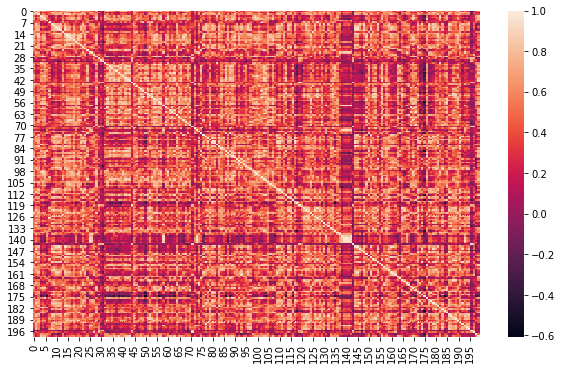

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr2)

In [42]:
user_movie_rating.head()

item,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index('10')

In [47]:
corr_coffey_hands  = corr[coffey_hands]
list(movie_title[(corr_coffey_hands >= 0.9)])[:10]

['10', '1005', '1194', '14', '1404', '16', '18', '20', '207', '212']